# Image Classification using AlexNet
![](images/AlexNet.png)

## Activation Function
ReLU

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.datasets.mnist as mnist
import tensorflow.keras as keras
from progressbar import progressbar
import os
import random

2023-07-27 00:48:30.122951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
class Dog():
    def __init__(self):
        self.image_values = None
        self.label = None
        self.id = None

def data_loader():
    '''
    Arguments
    IMAGE_HEIGHT: image height after resize
    IMAGE_WIDTH: image width after resize
    '''
    
    # defind some constant
    IMAGE_PATH = 'datasets/Standford_Dogs_Dataset/Images'

    # construct id to label dictionary and vice versa
    id2label = {}
    label2id = {}
    id_counter = 0
    for images_folder in os.listdir(IMAGE_PATH):
        if not images_folder.startswith('.'):
            label = images_folder
            id2label[id_counter] = label
            label2id[label] = id_counter
            id_counter += 1
    
    dogs = []
    for dog_type in progressbar( os.listdir(IMAGE_PATH) ):
        if not dog_type.startswith('.'):
            label = dog_type
            id = label2id[label]
            for dog_image in os.listdir(os.path.join(IMAGE_PATH, dog_type)):
                if not dog_image.startswith('.'):
                    temp_dog = Dog()
                    temp_dog.id = id
                    temp_dog.label = label
                    temp_dog.image_values = plt.imread(os.path.join(IMAGE_PATH,
                                                                    dog_type,
                                                                    dog_image))
                    dogs.append(temp_dog)
    
    random.shuffle(dogs)

    trainset = dogs[0:int(len(dogs) * 0.6)]
    cvset = dogs[int(len(dogs) * 0.6) : int(len(dogs) * 0.8)]
    testset = dogs[int(len(dogs) * 0.8) : len(dogs)]

    return id2label, label2id, trainset, cvset, testset

id2label, label2id, trainset, cvset, testset = data_loader()

num_classes = len(id2label)
print(f"{num_classes} different types of dogs")
print(f"Number of images in training set: {len(trainset)}")
print(f"Number of images in cross validation set: {len(cvset)}")
print(f"Number of images in test set: {len(testset)}")

100% (120 of 120) |######################| Elapsed Time: 0:00:43 Time:  0:00:43


120 different types of dogs
Number of images in training set: 12348
Number of images in cross validation set: 4116
Number of images in test set: 4116


In [7]:
IMAGE_HEIGHT = IMAGE_WIDTH = 227

# prepare x_train and y_train
x_train = np.ones((len(trainset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3)) 
y_train = np.ones( len(trainset) )
for idx , dog in progressbar( enumerate(trainset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_train[idx] = img[:,:,0:3]
    y_train[idx] = dog.id

# prepare x_cv and y_cv
x_cv = np.ones((len(cvset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3))  
y_cv = np.ones( len(cvset) )
for idx , dog in progressbar( enumerate(cvset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_cv[idx] = img[:,:,0:3]
    y_cv[idx] = dog.id

# prepare x_test and y_test
x_test = np.ones((len(testset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3)) 
y_test = np.ones( len(testset) )
for idx , dog in progressbar( enumerate(testset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_test[idx] = img[:,:,0:3]
    y_test[idx] = dog.id

    
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

| |                                             # | 12347 Elapsed Time: 0:00:51
| |                                               #| 4115 Elapsed Time: 0:00:24
| |                                     #          | 4115 Elapsed Time: 0:00:22


x_train shape: (12348, 227, 227, 3)
y_train shape: (12348,)
x_cv shape: (4116, 227, 227, 3)
y_cv shape: (4116,)
x_test shape: (4116, 227, 227, 3)
y_test shape: (4116,)


n02111277-Newfoundland


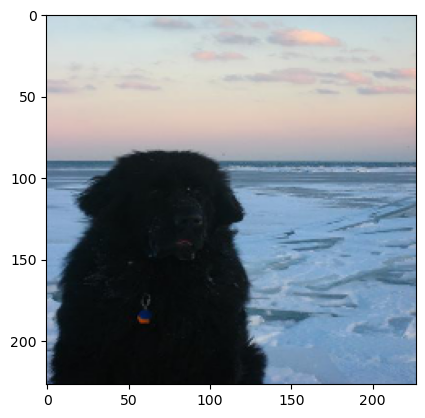

In [8]:
plt.imshow(np.uint8(x_train[0]))
print(id2label[y_train[0]])

In [9]:
x_train /= 255
x_cv /= 255

## Build AlexNet Model

In [10]:
alexnet = tf.keras.Sequential([
    tf.keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    
    ########################################
    
    tfl.Conv2D(filters = 96,
               kernel_size = (11, 11),
               strides = (4, 4),
               padding ='valid',
               activation ='relu'),
    
    tfl.MaxPooling2D(pool_size = (3, 3),
                     strides = (2, 2)),
    
    ######################################
    
    ######################################
    
    tfl.Conv2D(filters = 256,
               kernel_size = (5, 5),
               strides = (1, 1),
               padding ='same',
               activation ='relu'),
    
    tfl.MaxPooling2D(pool_size = (3, 3),
                     strides = (2, 2)),
    
    ######################################
    
    ######################################
    tfl.Conv2D(filters = 384,
               kernel_size = (3, 3),
               strides = (1, 1),
               padding ='same',
               activation ='relu'),
    
    tfl.Conv2D(filters = 384,
               kernel_size = (3, 3),
               strides = (1, 1),
               padding ='same',
               activation ='relu'),
    
    tfl.Conv2D(filters = 256,
               kernel_size = (3, 3),
               strides = (1, 1),
               padding ='same',
               activation ='relu'),
    
    tfl.MaxPooling2D(pool_size = (3, 3),
                     strides = (2, 2)),
   
    #######################################
    
    #######################################
    tfl.Flatten(),
    
    tfl.Dense(units = 4096, activation ='relu'),
    
    tfl.Dense(units = 4096, activation ='relu'),

    tfl.Dense(units = 120, activation ='softmax')
        ])

In [11]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [12]:
alexnet.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                              mode='min',  verbose=1, 
                                              patience=5)

y_train = np.uint8(y_train)
y_cv = np.uint8(y_cv)

alexnet.fit(x_train, 
            y_train,
            epochs = 10,
            validation_data = (x_cv, y_cv),
            callbacks=[early_stop])


a = set()
for value in y_train:
    a.add(value)
print(len(a))

Epoch 1/10


2023-07-27 00:21:17.900133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-27 00:21:17.987717: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


386/386 [==============================] - ETA: 0s - loss: 4.8615 - accuracy: 0.0079

2023-07-27 00:22:26.063867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


386/386 [==============================] - 74s 180ms/step - loss: 4.8615 - accuracy: 0.0079 - val_loss: 4.8485 - val_accuracy: 0.0097
Epoch 2/10
386/386 [==============================] - 46s 119ms/step - loss: 4.8493 - accuracy: 0.0092 - val_loss: 4.8469 - val_accuracy: 0.0078
Epoch 3/10
386/386 [==============================] - 44s 114ms/step - loss: 4.8489 - accuracy: 0.0086 - val_loss: 4.8601 - val_accuracy: 0.0066
Epoch 4/10
386/386 [==============================] - 44s 114ms/step - loss: 4.8477 - accuracy: 0.0100 - val_loss: 4.8627 - val_accuracy: 0.0083
Epoch 5/10
386/386 [==============================] - 44s 115ms/step - loss: 4.8499 - accuracy: 0.0099 - val_loss: 4.8453 - val_accuracy: 0.0070
Epoch 6/10
386/386 [==============================] - 44s 113ms/step - loss: 4.8500 - accuracy: 0.0083 - val_loss: 4.8303 - val_accuracy: 0.0078
Epoch 7/10
386/386 [==============================] - 44s 113ms/step - loss: 4.8472 - accuracy: 0.0092 - val_loss: 4.8367 - val_accuracy: 0.0

<Axes: >

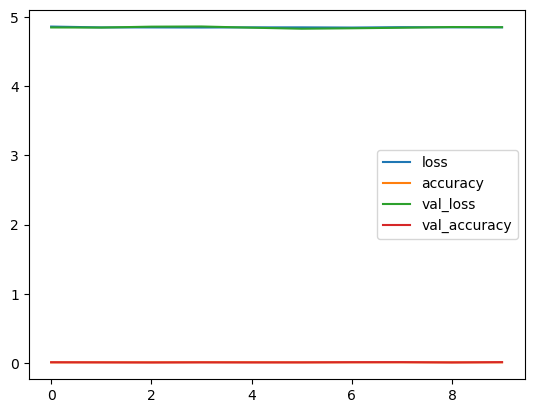

In [13]:
model_loss = pd.DataFrame(alexnet.history.history)
model_loss.plot()

## AlexNet cannot handle this data set

## Solution use transfer learning [(reference)](https://pub.towardsai.net/deep-learning-for-dog-breed-classification-77ef182a2509)

In [3]:
IMAGE_HEIGHT = IMAGE_WIDTH = 224

# prepare x_train and y_train
x_train = np.ones((len(trainset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3)) 
y_train = np.ones( len(trainset) )
for idx , dog in progressbar( enumerate(trainset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_train[idx] = img[:,:,0:3]
    y_train[idx] = dog.id

# prepare x_cv and y_cv
x_cv = np.ones((len(cvset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3))  
y_cv = np.ones( len(cvset) )
for idx , dog in progressbar( enumerate(cvset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_cv[idx] = img[:,:,0:3]
    y_cv[idx] = dog.id

# prepare x_test and y_test
x_test = np.ones((len(testset) , IMAGE_HEIGHT, IMAGE_WIDTH, 3)) 
y_test = np.ones( len(testset) )
for idx , dog in progressbar( enumerate(testset) ):
    img = dog.image_values
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    x_test[idx] = img[:,:,0:3]
    y_test[idx] = dog.id

    

    
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

/ |#                                                  | 0 Elapsed Time: 0:00:002023-07-27 00:51:04.369583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-27 00:51:04.369792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
| |                              #                | 12347 Elapsed Time: 0:00:40
| |                      #                         | 4115 Elapsed Time: 0:00:21
| |                               #                | 4115 Elapsed Time: 0:00:22


x_train shape: (12348, 224, 224, 3)
y_train shape: (12348,)
x_cv shape: (4116, 224, 224, 3)
y_cv shape: (4116,)
x_test shape: (4116, 224, 224, 3)
y_test shape: (4116,)


In [4]:
y_train = np.uint8(y_train)
y_cv = np.uint8(y_cv)
y_test = np.uint8(y_test)

x_train /= 225
x_cv /= 225
x_test /= 225

In [10]:
from tensorflow.keras.applications import inception_v3

inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', 
                                                include_top=False, 
                                                pooling='avg')

temp_train = inception_bottleneck.predict(x_train, 
                                          batch_size=32, 
                                          verbose=1)

temp_cv = inception_bottleneck.predict(x_cv, 
                                       batch_size=32, 
                                       verbose=1)


temp_test = inception_bottleneck.predict(x_test, 
                                         batch_size=32, 
                                         verbose=1)

2023-07-27 01:08:30.165853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 12s 93ms/step


In [11]:
model = tf.keras.Sequential([
    tfl.Flatten(),
    
    tfl.Dense(1024, activation='relu'),
    
    tfl.Dense(1024, activation='relu'),
    
    tfl.Dense(120, activation='softmax')
        ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(temp_train, 
          y_train, 
          epochs=50, 
          batch_size=32,
          validation_data=(temp_cv, y_cv))

Epoch 1/50


2023-07-27 01:11:09.062845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-27 01:11:09.098434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


386/386 [==============================] - ETA: 0s - loss: 9.4354 - accuracy: 0.1130

2023-07-27 01:11:13.655106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


386/386 [==============================] - 6s 13ms/step - loss: 9.4354 - accuracy: 0.1130 - val_loss: 21.7302 - val_accuracy: 0.2988
Epoch 2/50
386/386 [==============================] - 5s 13ms/step - loss: 16.8524 - accuracy: 0.1772 - val_loss: 35.6254 - val_accuracy: 0.4227
Epoch 3/50
386/386 [==============================] - 5s 13ms/step - loss: 25.5950 - accuracy: 0.2183 - val_loss: 34.8332 - val_accuracy: 0.5892
Epoch 4/50
386/386 [==============================] - 5s 13ms/step - loss: 27.2557 - accuracy: 0.2595 - val_loss: 37.5193 - val_accuracy: 0.6317
Epoch 5/50
386/386 [==============================] - 5s 13ms/step - loss: 27.3383 - accuracy: 0.2814 - val_loss: 44.1804 - val_accuracy: 0.6312
Epoch 6/50
386/386 [==============================] - 5s 13ms/step - loss: 30.9425 - accuracy: 0.2975 - val_loss: 49.9871 - val_accuracy: 0.6426
Epoch 7/50
386/386 [==============================] - 5s 13ms/step - loss: 30.7366 - accuracy: 0.3079 - val_loss: 54.5126 - val_accuracy: 0.67

<Axes: >

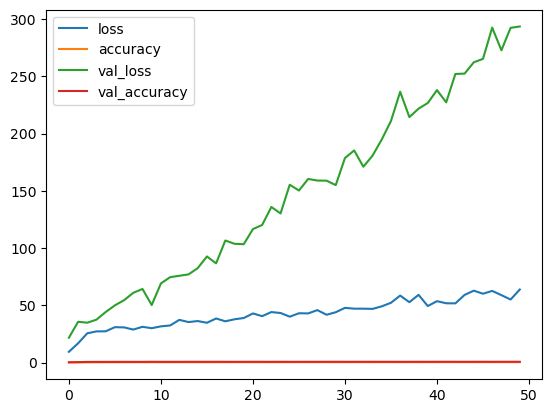

In [12]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [13]:
model.evaluate(temp_test, y_test)

129/129 [==============================] - 1s 7ms/step - loss: 297.4416 - accuracy: 0.7218


[297.4415588378906, 0.7218173146247864]